In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import numpy as np

In [33]:
df_doubling = pd.read_excel('./doubling time.xlsx', index_col=3, header=3).dropna(axis='index',how='all').dropna(axis='columns', how='all')
df_doubling = df_doubling.iloc[:12,[2]]
df_doubling = df_doubling.rename({'Unnamed: 7':'Doubling time'},axis=1)
df_doubling

,Doubling time
PLC M1,19.002375
PLC M2,20.024691
PLC M3,21.102151
PLC M4,24.191617
PLC M5,42.275132
PLC M6,64.420567
Huh7 M1,16.858238
Huh7 M2,16.470588
Huh7 M3,18.106996
Huh7 M4,18.518519


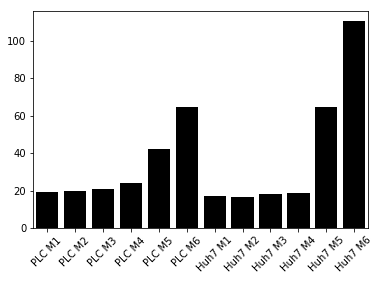

In [46]:
doubling_barplot = sns.barplot(data=df_doubling.transpose(),color='k')
plt.setp(doubling_barplot.get_xticklabels(), rotation=45)
plt.show()

In [141]:
# read excel file and remove NaNs
df_hplc_lac_pyr = pd.read_excel('./hplc.xlsx', sheet_name='lactate', index_col=2, header=7).dropna(axis='index',how='all').dropna(axis='columns', how='all')

# fix column typos
df_hplc_lac_pyr = df_hplc_lac_pyr.rename({'Avarage value ':'Concentration [mM]',
                                         'Avarage value .1':'Concentration [mM]',
                                         'Standart error':'SD',
                                         'Standart error.1':'SD'},axis=1)

# fix index column
df_hplc_lac_pyr.index = df_hplc_lac_pyr.index.str.replace('HUHC3M([0-9]{1})[0-9]+$',r'Huh7 M\1', regex=True)
df_hplc_lac_pyr.index = df_hplc_lac_pyr.index.str.replace('PLCC3M([0-9]{1})[0-9]+$',r'PLC M\1', regex=True)

# identify the lacate, pyruvate, huh7 and plc subsets of the data
df_hplc_lac_huh = df_hplc_lac_pyr.filter(axis='index',like='Huh7').iloc[:,1:4]
df_hplc_pyr_huh = df_hplc_lac_pyr.filter(axis='index',like='Huh7').iloc[:,4:6]
df_hplc_lac_plc = df_hplc_lac_pyr.filter(axis='index',like='PLC').iloc[:,1:4]
df_hplc_pyr_plc = df_hplc_lac_pyr.filter(axis='index',like='PLC').iloc[:,4:6]

df_hplc_pyr_plc

,Concentration [mM],SD
PLC M1,0.0000,0.000000
PLC M1,0.1270,0.006350
PLC M1,0.1870,0.013090
PLC M1,0.2750,0.022000
PLC M1,0.2700,0.013500
PLC M2,0.0000,0.000000
PLC M2,0.2510,0.025100
PLC M2,0.3310,0.016550
PLC M2,0.3240,0.048600
PLC M2,0.3190,0.031900


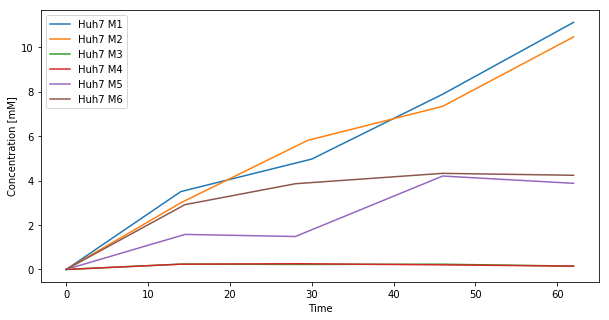

In [157]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=df_hplc_lac_huh, x='Time', y='Concentration [mM]',hue=df_hplc_lac_huh.index,markers='*',err_style="bars")
plt.show()